<h1><center><br>Implementing a Regression Tree<br></center></h1>

# Introduction

Decision trees can learn rules to map features to both continous and discrete outputs. In this quiz, you will consider the continous case and implement a regression tree to predict house prices in Boston. You will also conduct small data analysis and evaluation procedures. This notebook will guide you through.

## (10 pts) Task 1: Dataset 

Run the cells below to load Boston house prices dataset using `scikit-learn`. You can find more detail on the dataset [here](https://scikit-learn.org/stable/datasets/index.html#boston-dataset). **Please use the train and test matrices we prepared for you :)**

In [2]:
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
boston = load_boston()
X_y = np.column_stack([boston['data'], boston['target']])
np.random.seed(1)
np.random.shuffle(X_y)
X, y = X_y[:,:-1], X_y[:,-1]
X_train, y_train = X[:400], y[:400]
X_test, y_test = X[400:], y[400:]
del X, y, X_y

**(10 pts)** Unlike the dataset in Project 1, Boston dataset is high-dimensional and we cannot observe the relations between all features and the output with a single scatter plot. What we can do is to visualize the correlations between both features and house prices using a heatmap. So, stack the features and the outputs in a single matrix and compute correlation between all pairs of columns. Visualize the correlation coefficient matrix as a heatmap, which is $(N+1)x(N+1)$, where $N$ is the number of features in Boston dataset. You can check out `corrcoef` and `heatmap` functions from `numpy` and `seaborn` libraries, respectively. You can use diverging color palette to emphasize both positive and negative correlations.

Do you observe strong correlations between any pair of features or certain features and house price? 

In [4]:
#Yes,We observe green squares represents high relation also RM is related highly with Prices,and LSTAT is negatively related 
feats=boston['feature_names']

data=boston['data']

Prices=boston['target']

df=pd.DataFrame(data,columns=feats)
df.insert(loc=13,column="Prices",value=Prices)
df_train=df.iloc[0:400,:]
df_test=df.iloc[400:,:]


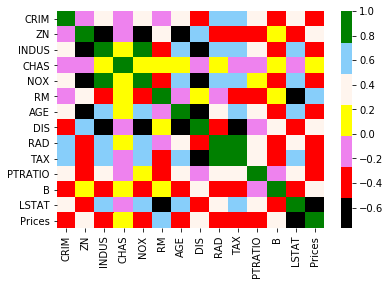

In [5]:
ccm=df.corr() # ccm refers to correlation coefficient matrix
sns.heatmap(ccm,cmap=['black','red','violet','yellow','seashell','lightskyblue','green'])

In [6]:

#Price is positively correlated with RM and negavitely correlated with LSTAT features.

## (80 pts) Task 2: Regression Tree


**(15 pts)** Let us now build the regression tree. We start by implementing the splitting criteria which is used to decide the most discriminative features at each step. We stick to lecture notes and use $RSS$ which is computed as follows:

$$RSS =\sum_{\text {left }}\left(y_{i}-y_{L}^{*}\right)^{2}+\sum_{\text {right }}\left(y_{i}-y_{R}^{*}\right)^{2}$$

where $y_L^* and y_L^*$ are mean y-value of left and right nodes.

When you implement $RSS$, pick the most correlated and least correlated feature with the output prices according to previous step. Note that correlation can be both positive and negative! For both features, compute $RSS$ for every possible split threshold and plot thresholds versus RSS scores.

Do two features display different characteristics?

In [7]:

def RSS_Finder(data,Featind):  # we calculate RSS value of data for given feature 
    
    
    size=data.iloc[:,-1].size
    Score=np.zeros([size,1])
    ThresholdMatrix=np.zeros([size,1])
    
    
        
    for i in range(size):
      
        Threshold=data.iloc[i,Featind]                #Thresholds are data points we try one by one
         
        L=data[data.iloc[:,Featind]<=Threshold]       # we split data into two, according to current threshold
        R=data[data.iloc[:,Featind]>=Threshold]       # then find the mean of this two group and calculate RSS
        sizeL=L.iloc[:,-1].size
        sizeR=R.iloc[:,-1].size
        lm=np.mean(L.iloc[:,-1])
        rm=np.mean(R.iloc[:,-1])
        sum1=0
        sum2=0
        for j in range(sizeL):
            sum1+=np.square(L.iloc[j,-1]-lm)
        for j in range(sizeR):
            sum2+=np.square(R.iloc[j,-1]-rm)
            
        
 
        Score[i]=sum1+sum2
        ThresholdMatrix[i]=Threshold
         
     
    for i in range(size):
         if(Score[i]==np.min(Score)):
            ind=i
            break
    best_Th=ThresholdMatrix[ind]

    
    return Score,ThresholdMatrix,best_Th[-1],ind


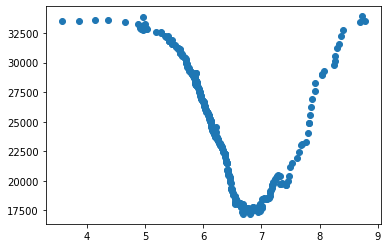

In [8]:
Score_Matrix,Threshold_Matrix,_,_=RSS_Finder(df_train,5) # the RM column is the most correlated
plt.scatter(Threshold_Matrix,Score_Matrix)

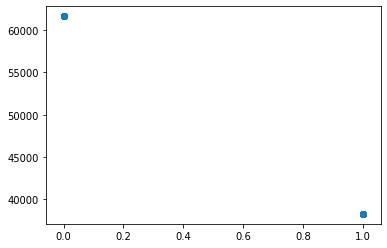

In [9]:
Score_Matrix,Threshold_Matrix,_,_=RSS_Finder(df_train,3) # the CHAOS column is the least correlated
plt.scatter(Threshold_Matrix,Score_Matrix)

In [10]:
#-Do two features display different characteristics?
#Yes, the most correlated column which is named "RM" is continous over the thresholds but the least correlated is just has
#two values so it does not give us much discriminative information  

**(45 pts)** Now implement the training procedure of a regression tree using $RSS$ as split criteria. Build a rule tree recursively by traversing all features and considering each split threshold to find the optimum split, at every node.

You are free to implement training procedure as a standalone function or part of a class, but in any case use maximum depth as the stopping condition.

**(15 pts)** Having implemented the regression tree, now write a procedure to predict test features. Given a sample, this procedure should follow the rules learned during the training to arrive at a leaf and predict the output as the mean output of the arrived leaf samples. 

If you have implemented a regression tree class, you can insert this procedure as a class function 

In [11]:
# In this two part I solved them in one algorithm while learning from data we create the nodes of tree at the same time
# and the prediction function is find_leaf which exist in "Node class"

In [12]:
class Node:
    def __init__(self,data,th,i,k,lm,rm):               # th : Threshold
        self.data=data                                  # i  : Current index
        self.i=i                                        # k  : Current Column(feature)
        self.Left=None                                  # lm : Mean of Left data                          
        self.Right=None                                 # rm : Mean of Right data
        self.k=k
        self.lm=lm              
        self.rm=rm        
        self.th=th
    
    def insert(self,data,th,i,k,lm,rm):                #Insert method takes the threshold and feature information and      
        if(data.iloc[i,self.k]<self.th):               #creates the nodes after checking the position
            if self.Left:
                self.Left.insert(data,th,i,k,lm,rm)
            else:
                self.Left=Node(data,th,i,k,lm,rm)  
        else:
            if self.Right:
                self.Right.insert(data,th,i,k,lm,rm)
            else:
                self.Right=Node(data,th,i,k,lm,rm) 
            
            
    def find_leaf(self,point):                        #This is the finder of leaves, we check every node that we create
        if(self.th>point[self.k]):                    #and we reach the leaves at the very bottom
            if self.Left:
                
                return self.Left.find_leaf(point)
                
            else:
                return self.lm
        else:
            if self.Right:
                 
                return self.Right.find_leaf(point)
            else:
                return self.rm
             
            
    
    
    
    
class Tree:                                           #This is the tree class we take the main root first and then
    def __init__(self):                               #create the other nodes recursively through this root and 
        self.root= None                               #we call the functions from the "tree class"
         
    
    def insert(self,data,th,i,k,lm,rm):
        if self.root:
            return self.root.insert(data,th,i,k,lm,rm)
        else:
            self.root=Node(data,th,i,k,lm,rm)
    
    
    def find_leaf(self,point):
        return self.root.find_leaf(point)

In [13]:
def Splitter(df):           # splitter method take the data and visit all features one by one and create RSS score matrix
                            # by doing so, find the column that gives us the lowest RSS and return the column and threshold 
    temp=999999
        
    for i in range(13):
             
        Score,_,threshold,threshold_index=RSS_Finder(df,i)
        RSS_Value=Score[threshold_index]
        if(RSS_Value<temp):
            temp=RSS_Value
            Current_Column=i
            th=threshold
            ind=threshold_index
    
    Left_Data=df[df.iloc[:,Current_Column]<=th]
    Right_Data=df[df.iloc[:,Current_Column]>=th]
            
        
    return Left_Data,Right_Data,th,Current_Column,ind



def NodeMaker(data,max_depth,DepthCounter,mean,tree):       #NodeMaker as name indicates makes nodes and at the same time 
                                                            #we send the information to tree class in every turn recursively
    if (DepthCounter==max_depth):
        
        return  
    
    Left_Data,Right_Data,threshold,Current_Column,index=Splitter(data)  # we split the data into two group here
     
    Left_Mean=np.mean(Left_Data.iloc[:,-1])                              #these are the means of splitted data 
    Right_Mean=np.mean(Right_Data.iloc[:,-1])                            #we store them, they will be a leaf at the end                         
    
    DepthCounter+=1                                             # stopping condition is max depth so every node we increase
                                                                # counter and at the beginning we check and stop method
    
    tree.insert(data,threshold,index,Current_Column,Left_Mean,Right_Mean)  #we insert nodes to "tree class"
    
    if(Left_Data.iloc[:,-1].size>1):                                    # if number of remaning samples is less than two we
        NodeMaker(Left_Data,max_depth,DepthCounter,Left_Mean,tree)      #we stop and the last data point become a leaf
      
    if(Right_Data.iloc[:,-1].size>1):
        NodeMaker(Right_Data,max_depth,DepthCounter,Right_Mean,tree)
     

            




**(5 pts)** Train your model using a max depth of 3 and visualize the resulting tree. You can use an external tool such as draw.io or LaTeX for drawing. Annotate the nodes with split columns and thresholds. You can view the tree in this [link](https://scikit-learn.org/stable/modules/tree.html#tree) as an example. 

In [14]:
def PrintNodes(data,max_depth,DepthCounter):       
    if (DepthCounter==max_depth):
        return  
    
    Left_Data,Right_Data,threshold,Current_Column,index=Splitter(data)  
    print("Threshold is ",threshold)
    print("Split Column is ",Current_Column)
    
    
    DepthCounter+=1                             
    
    PrintNodes(Left_Data,max_depth,DepthCounter)    
    PrintNodes(Right_Data,max_depth,DepthCounter)

# I arranged the model and add print comments to learn node thresholds and split columns

In [15]:
PrintNodes(df_train,3,0)

Threshold is  6.678
Split Column is  5
Threshold is  14.43
Split Column is  12
Threshold is  1.5106
Split Column is  7
Threshold is  0.7842
Split Column is  0
Threshold is  7.42
Split Column is  5
Threshold is  9.71
Split Column is  12
Threshold is  18.0
Split Column is  10


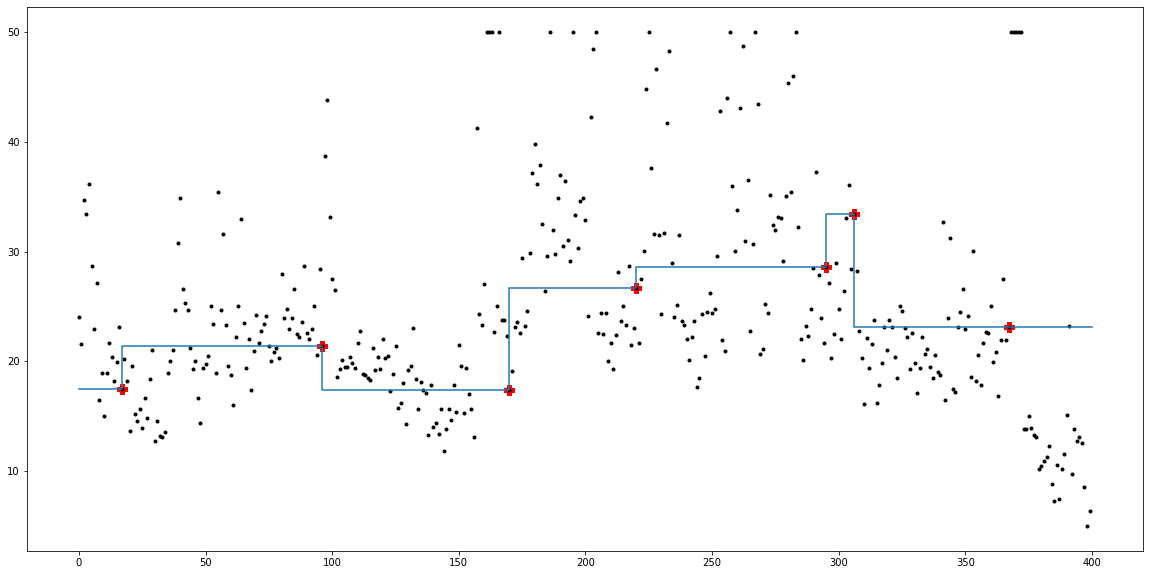

In [16]:
import matplotlib.lines as lines
fig=plt.figure(figsize=(20,10))

#we now use scatter to plot data

plt.scatter(295, df_train.iloc[295,-1] ,s=100,marker='P',color='red')
plt.scatter(170, df_train.iloc[170,-1] ,s=100,marker='P',color='red')
plt.scatter(367, df_train.iloc[367,-1] ,s=100,marker='P',color='red')
plt.scatter(17, df_train.iloc[17,-1] ,s=100,marker='P',color='red')
plt.scatter(306, df_train.iloc[306,-1] ,s=100,marker='P',color='red')
plt.scatter(220, df_train.iloc[220,-1] ,s=100,marker='P',color='red')
plt.scatter(96, df_train.iloc[96,-1] ,s=100,marker='P',color='red')
plt.scatter(range(0,400), df_train.iloc[0:400,-1] ,marker='.',color='black')
x1=17
x2=96
x3=170
x4=220
x5=295
x6=306
x7=367
y4=df_train.iloc[220,-1]
y3=df_train.iloc[170,-1]
y7=df_train.iloc[367,-1]
y1=df_train.iloc[17,-1]
y5=df_train.iloc[295,-1]
y6=df_train.iloc[306,-1] 
y2=df_train.iloc[96,-1] 
 
x_values  = [400,x7,x7,x7,x6,x6,x6,x6,x5,x5,x5,x5,x4,x4,x4,x4,x3,x3,x2,x2,x2,x1,x1,x1,x1,0]
y_values =  [y7,y7,y7,y7,y7,y6,y6,y6,y6,y5,y5,y5,y5,y4,y4,y4,y4,y3,y3,y3,y2,y2,y2,y2,y1,y1]

plt.plot(x_values,y_values)

## **(10 pts)** Task 3: Evaluation

**(5 pts)** Now is time to pick the best maximum depth and observe your tree's performance! Implement a 5-fold cross validation procedure to experiment with maximum depths from 3 to 10. Report mean and standard deviation for each depth and pick the best one. For comparison you can use $R^2$, which is a metric frequently used to evaluate regression models. You can use `r2_score` function of `scikit-learn` and read more [here](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score).

In [17]:
# I splitted all data into 5 groups
from sklearn.metrics import r2_score
cv5_train=df.iloc[0:400,:]
cv5_test=df.iloc[400:500,:]

cv4_train=pd.DataFrame(np.concatenate((df.iloc[0:300,:],df.iloc[400:500,:])))
cv4_test =df.iloc[300:400,:]

cv3_train=pd.DataFrame(np.concatenate((df.iloc[0:200,:],df.iloc[300:500,:])))
cv3_test=df.iloc[200:300,:]

cv2_train=pd.DataFrame(np.concatenate((df.iloc[0:100,:],df.iloc[200:500,:])))
cv2_test=df.iloc[100:200,:]

cv1_train=df.iloc[100:500,:]
cv1_test=df.iloc[0:100,:]

def implement_CV(train_data,test_data,maxdepth):   #implement_cv train the data and use "find_leaf" method to predict
    tree=Tree()
     
    NodeMaker(train_data,maxdepth,0,0,tree)

    size=test_data.iloc[:,-1].size
    prediction_matrix=np.zeros([size,1])

    for i in range(size):
        prediction_matrix[i]=tree.find_leaf(test_data.iloc[i,:]) # we send info into tree class
    success=r2_score(test_data.iloc[:,-1],prediction_matrix) #report the R2 Score
    return success

def Evaluation(a,b):            # a and b values indicate the max depth, from a to b
     
    for i in range(a,b):
        sum_of_rates=0
        sum_of_rates+=implement_CV(cv1_train,cv1_test,i)
        sum_of_rates+=implement_CV(cv2_train,cv2_test,i)
        sum_of_rates+=implement_CV(cv3_train,cv3_test,i)
        sum_of_rates+=implement_CV(cv4_train,cv4_test,i)
        sum_of_rates+=implement_CV(cv5_train,cv5_test,i)
        avg=sum_of_rates/5
        
        print("Average R2 score is ",avg,"for max depth =",i)

In [23]:
%%time
Evaluation(3,10) 

#we can see from cross validation reports, choosing max depth 4 is the best option

"""It is too long to implement this cv process it takes more than one hours"""  

Average R2 score is  0.3871767729953754 for max depth = 3
Average R2 score is  0.44533483289106834 for max depth = 4
Average R2 score is  0.43504963643091327 for max depth = 5
Average R2 score is  0.41273206225811165 for max depth = 6
Average R2 score is  0.37606380456894206 for max depth = 7
Average R2 score is  0.3767674906537989 for max depth = 8
Average R2 score is  0.38471478210256493 for max depth = 9
Wall time: 1h 36min 42s



**(5 pts)** To conclude, train your tree one last time on the whole training data with the depth you picked in the previous section. Generate predictions on both training and test sets and report $R^2$ scores.

In [18]:
trainseed1=pd.DataFrame(X_train,columns=feats)             # since i implemented all algorithms with prices column inside
trainseed1.insert(loc=13,column="Prices",value=y_train)    # the data frame, i  merged X and y values here

testseed1=pd.DataFrame(X_test,columns=feats)
testseed1.insert(loc=13,column="Prices",value=y_test)


In [21]:
r2score=implement_CV(df_train,df_train,4)  
print("R2 score for training data",r2score)

R2 score for training data 0.8872480995080804


In [20]:
r2score=implement_CV(trainseed1,testseed1,4)  
print("R2 score for testing data",r2score)

R2 score for testing data 0.8489128956326658
